# Sales Data Analysis

### Import libraries

In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#### Merging the 12 months files

In [9]:
files = [f for f in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame() #creating a new dataframe

for f in files:
    df = pd.read_csv("./Sales_Data/"+f)
    all_months_data = pd.concat([all_months_data, df]) #concatenating each file into the dataframe

all_months_data.to_csv('all_data.csv', index=False) #saving the merged file

#### Read in updated dataframe

In [10]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data cleaning

In [11]:
nan = all_data[all_data.isna().any(axis=1)]
# Dropping the rows that are entirely empty or 'NaN'
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Removing 'Or' in Month

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Column conversions

In [13]:
all_data['Order ID'] = all_data['Order ID'].astype('int32')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\3385215338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order ID'] = all_data['Order ID'].astype('int32')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\3385215338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\3385215338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [24]:
# Converting to datetime object

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%d/%m/%y %H:%M')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


### Augment data with additional columns

In [14]:
# Adding the month column

all_data['Month'] = all_data['Order Date'].str[:2] # creating a month column through first 2 characters from order date
all_data['Month'] = all_data['Month'].astype('int32') # converting month column into int
all_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\581984206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[:2] # creating a month column through first 2 characters from order date
C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\581984206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32') # converting month column into int


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
# Adding a Sales column

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\511353339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
# Adding a City column

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\3273691183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [17]:
# Resetting index

all_data = all_data.reset_index(drop = True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


### Q1: What was the best month for sales? How much was earned that month?

In [83]:
df1 = all_data.groupby(all_data['Month']).sum()['Sales']
m = 0
s = 0
for i, x in enumerate(df1):
    if x == df1.max():
        m = i+1
        s = x

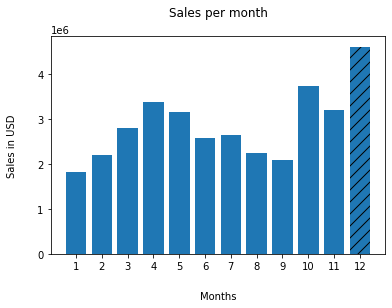

The best for sales is 12 and the amount earned in that month is 4613443.34


In [101]:
plt.title('Sales per month',pad=20)

m_bar = plt.bar(df1.index,df1) # bar graph
plt.xticks(df1.index) # setting the index for x axis
plt.xlabel('Months',labelpad=20) 
plt.ylabel('Sales in USD',labelpad=20)

for i in range(1,len(df1)+1):
    if df1[i] == df1.max():
        m_bar[i-1].set_hatch('//')
plt.show()
print(f"The best for sales is {m} and the amount earned in that month is {s}")

### Q2: What city had the highest number of sales?

In [68]:
df2 = all_data.groupby('City').sum()['Sales']
c = 0
s = 0
df2.index = [i.strip() for i in df2.index]
for i in range(len(df2.index)):
    if df2[i] == df2.max():
        c = df2.index[i]
        s = df2[i]

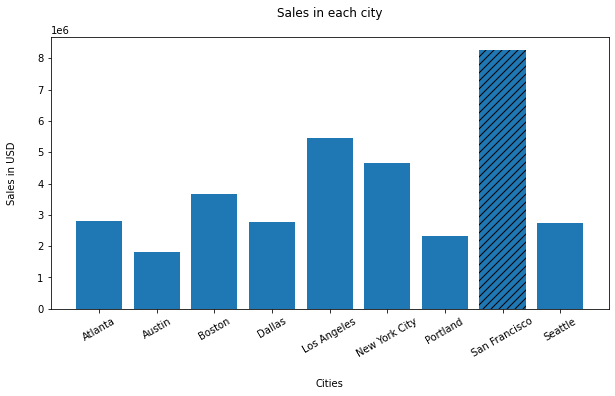

The city having the highest number of sales is San Francisco with an amount of $8262203.91


In [70]:
plt.figure(figsize=(10,5))
plt.title('Sales in each city',pad=20)

c_bar = plt.bar(df2.index,df2)
plt.xticks(rotation=30)
plt.xlabel('Cities',labelpad=20)
plt.ylabel('Sales in USD',labelpad=20)

for i in range(len(df2)):
    if df2[i] == df2.max():
        c_bar[i].set_hatch('///')

plt.show()
print(f"The city having the highest number of sales is {c} with an amount of ${s}")

### Q3: What time should we display advertisements to maximize likelihood of customer buying product?

In [31]:
# Creating Hour and Minute column through datetime facilities

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,56
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,0
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,39
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,30


In [56]:
all_data.groupby('Hour').count().head() # To count the number of orders per hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


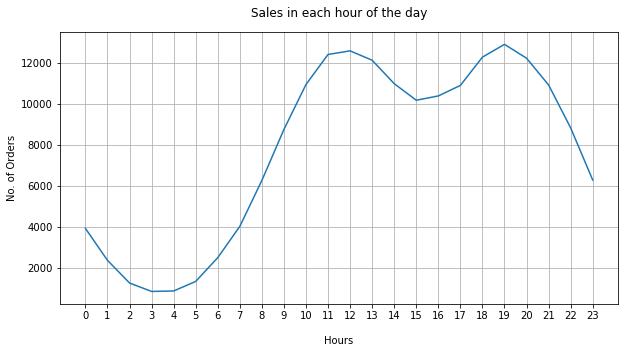


The likelihood of customers buying product can be maximized by advertising in the hours: 11 12 13 18 19 20 

In [59]:
hours = [h for h, df in all_data.groupby('Hour')]

plt.figure(figsize=(10,5))
plt.plot(hours, all_data.groupby('Hour').count()['Sales']) 
plt.title('Sales in each hour of the day',pad=15)
plt.xlabel('Hours',labelpad=15)
plt.ylabel('No. of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

max_hr = []

for i in range(len(hours)):
    if all_data.groupby('Hour').count()['Sales'][i] > 12000:
        max_hr.append(i)
print()
print(f"The likelihood of customers buying product can be maximized by advertising in the hours: ",end="")
for i in max_hr:
    print(i, end=" ")

### Q4: What products are most often sold together?

In [119]:
df4 = all_data[all_data['Order ID'].duplicated(keep=False)]
df4['Grouped'] = df4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df4 = df4[['Order ID','Grouped']].drop_duplicates(subset='Grouped',keep='first',ignore_index=True)
df4.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\3466376236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Grouped'] = df4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [122]:
from itertools import combinations
from collections import Counter

count = Counter()

for i in df4['Grouped']:
    l = i.split(',')
    count.update(Counter(combinations(l, 2)))
for k, v in count.most_common(10): # function in Counter
    print(f"{k} -> {v}")

('Google Phone', 'USB-C Charging Cable') -> 21
('iPhone', 'Lightning Charging Cable') -> 19
('Google Phone', 'Wired Headphones') -> 14
('USB-C Charging Cable', 'Wired Headphones') -> 12
('Google Phone', 'Bose SoundSport Headphones') -> 8
('iPhone', 'Wired Headphones') -> 8
('iPhone', 'Apple Airpods Headphones') -> 7
('Vareebadd Phone', 'Wired Headphones') -> 7
('Vareebadd Phone', 'USB-C Charging Cable') -> 6
('USB-C Charging Cable', 'Bose SoundSport Headphones') -> 6


### Q5: What product sold the most? Why do you think it sold the most?

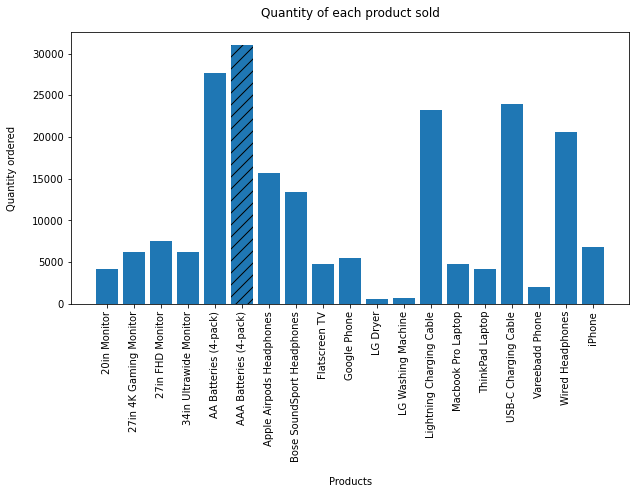


The product that is most sold is AAA Batteries (4-pack) with total quantity ordered of 31017
This might be due to the extensive need and usage of batteries in everyday life as compared to other products


In [145]:
df5 = all_data.groupby('Product')
qo = df5.sum()['Quantity Ordered']
prod = [p for p, df in df5]

plt.figure(figsize=(10,5))
p_bar = plt.bar(prod, qo)
plt.xticks(rotation=90)
plt.title('Quantity of each product sold',pad=15)
plt.xlabel('Products',labelpad=15)
plt.ylabel('Quantity ordered',labelpad=15)

p = ''
q = 0
for i in range(len(prod)):
    if qo[i] == qo.max():
        q = qo[i]
        p = prod[i]
        p_bar[i].set_hatch('//')

plt.show()
print()
print(f"The product that is most sold is {p} with total quantity ordered of {int(q)}")
print("This might be due to the extensive need and usage of batteries in everyday life as compared to other products")